In [58]:
# IMPORTING PACKAGES
# data processing
import pandas as pd 
# working with arrays
import numpy as np 
# Data Visualization
import matplotlib.pyplot as plt
# Advanced tools
import itertools 
# data normalization
from sklearn.preprocessing import StandardScaler
# data split
from sklearn.model_selection import train_test_split
# Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
# KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# Logistic regression algorithm
from sklearn.linear_model import LogisticRegression 
# SVM algorithm
from sklearn.svm import SVC 
# Random forest tree algorithm
from sklearn.ensemble import RandomForestClassifier
# XGBoost algorithm
from xgboost import XGBClassifier 
 #LGBM Classifier
from lightgbm import LGBMClassifier
# evaluation metric
from sklearn.metrics import confusion_matrix 
# evaluation metric
from sklearn.metrics import accuracy_score
# evaluation metric
from sklearn.metrics import f1_score 

In [73]:
df = pd.read_csv('creditcard.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [61]:
df.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Counting number of Fraudulent transaction

In [75]:
df['Class'].value_counts()[1]

492

Counting number of non fraudulent transaction

In [76]:
df['Class'].value_counts()[0]

284315

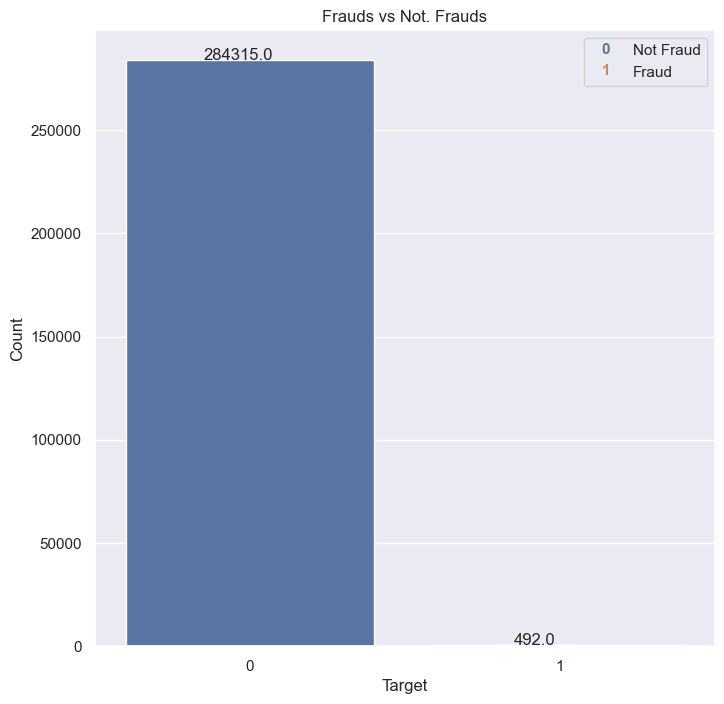

In [83]:
# Plot a bar graph
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

# Class for create special legend on the right of the Countplot fig.
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent, width, height, fontsize,trans):
        tx = Text(width/2., height/2, tup[0], fontsize=fontsize, ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

# Countplot
ax = sns.countplot(x="Class", data=df)
plt.title("Frauds vs Not. Frauds")
plt.xlabel("Target")
plt.ylabel("Count")
sns.set(rc = {'figure.figsize':(8,8)})
#Add quantity to each bar
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Add right legend
handltext = ["0", "1"]
labels = ["Not Fraud", "Fraud"]

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()})

/var/folders/p0/dpsjj8hd3ps5ccx9j68tktr40000gn/T/ipykernel_12273/488329012.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/var/folders/p0/dpsjj8hd3ps5ccx9j68tktr40000gn/T/ipykernel_12273/488329012.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val

(0.0, 172792.0)

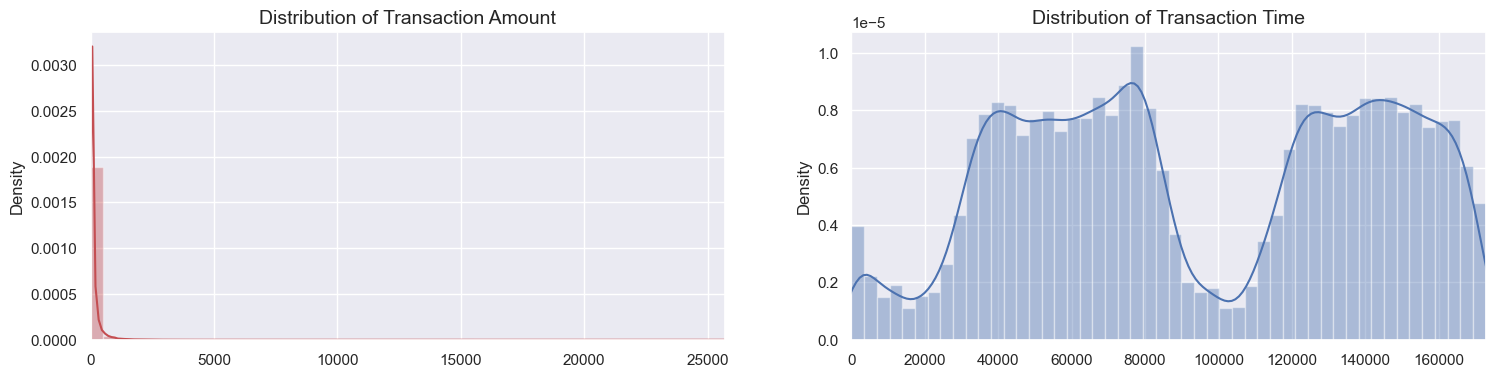

In [84]:
# Time and Amount distribution
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [77]:
#Importing dataset
df.drop('Time', axis = 1, inplace = True)

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [78]:
# Exploring the shape and features of the data
cases = len(df)
nonfraudulent_count = len(df[df.Class == 0])
fraudulent_count = len(df[df.Class == 1])
fraudulent_percentage = round(fraudulent_count/nonfraudulent_count*100, 2)
print('Number of cases {}'.format(cases))
print('Number of non-fraudulent cases {}'.format(nonfraudulent_count))
print('Number of fraudulent cases {}'.format(fraudulent_count))
print('Percentage of fraudulent Cases {}'.format(fraudulent_percentage))

Number of cases 284807
Number of non-fraudulent cases 284315
Number of fraudulent cases 492
Percentage of fraudulent Cases 0.17


In [66]:
#Exploring the data statistically
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]
print('CASE AMOUNT STATISTICS')
print('NON-FRAUD CASE AMOUNT STATS')
print('----------------------------')
print(nonfraud_cases.Amount.describe())
print('FRAUD CASE AMOUNT STATS')
print('----------------------------')
print(fraud_cases.Amount.describe())

CASE AMOUNT STATISTICS
NON-FRAUD CASE AMOUNT STATS
----------------------------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
FRAUD CASE AMOUNT STATS
----------------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [80]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


##### Using Bar chart to view the Skewness of the dataset

In [ ]:
#Data Normalization
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
print(df['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [ ]:
# DATA SPLITTING

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X_train samples {}'.format(X_train[:1]))
print('X_test samples {}'.format(X_test[0:1]))
print('y_train samples {}'.format(y_train[0:20]))
print('y_test samples {}'.format(y_test[0:20]))


X_train samples [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Building Models

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

tree_yhat


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

# 2. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)



In [ ]:
# 3. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)



In [ ]:

# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)


In [ ]:
# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)


In [ ]:
# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)


/Users/hijoes/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:00:16] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:

#7. LGBMClassifier
estimator = LGBMClassifier(learning_rate=0.22,n_estimators =100
                               ,scale_pos_weight= 3.5,max_depth=16,num_leaves=50,reg_lambda=0.3,)# parameters for the algorithm this was done by manual tuning

estimator.fit( X_train, y_train, )# fitting on train data
estimator_yhat = estimator.predict(X_test)


LGBMClassifier(learning_rate=0.22, max_depth=16, num_leaves=50, reg_lambda=0.3,
               scale_pos_weight=3.5)

In [82]:
print('------------------------------------------------------------------------')
print('F1 for Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('F1 for KNN model is {}'.format(f1_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('F1 for Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
print('F1 for SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('F1 for Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('F1 for XGBoost is {}'.format(f1_score(y_test,xgb_yhat)))
print('------------------------------------------------------------------------')
print('F1 for lightgbm is {}'.format(f1_score(y_test,estimator_yhat)))

------------------------------------------------------------------------
F1 for Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 for KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 for Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 for SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 for Random Forest Tree model is 0.7796610169491525
------------------------------------------------------------------------
F1 for XGBoost is 0.8449197860962566
------------------------------------------------------------------------
F1 for lightgbm is 0.8076923076923076


Final Thoughts

We will observe that from our outputin the pandas dataframe above,we have :

KNN Model as the most performing model with approx 86% accuracy.
XGBoost Model as the most performing model after the KNN Model with approx 84% accuracy.
Decision Tree Model as the most performing model after the XGBoost Model with approx 81% accuracy.
Lightgbm as the most performing model after the Decision Tree Modelwith approx 80% accuracy.
SVM Model as the most performing model after the Lightgbm Model with approx 77% accuracy.
Random Forest Model as the most performing model after the SVM Model with approx 77% accuracy too.
Logistic Regression Model as the most performing model after the Random Forest Model with approx 74% accuracy.